In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

In [3]:
from google.colab import files
uploaded = files.upload()
file_name = 'train.csv'
df = pd.read_csv(file_name)
print(df.head())

Saving train.csv to train.csv
                 id                                       comment_text  toxic  \
0  0000997932d777bf  Explanation\nWhy the edits made under my usern...      0   
1  000103f0d9cfb60f  D'aww! He matches this background colour I'm s...      0   
2  000113f07ec002fd  Hey man, I'm really not trying to edit war. It...      0   
3  0001b41b1c6bb37e  "\nMore\nI can't make any real suggestions on ...      0   
4  0001d958c54c6e35  You, sir, are my hero. Any chance you remember...      0   

   severe_toxic  obscene  threat  insult  identity_hate  
0             0        0       0       0              0  
1             0        0       0       0              0  
2             0        0       0       0              0  
3             0        0       0       0              0  
4             0        0       0       0              0  


In [4]:
df.iloc[0]['comment_text']

"Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27"

# 1.Preprocessing

In [5]:
from tensorflow.keras.layers import TextVectorization

In [6]:
X = df['comment_text']
y = df[df.columns[2:]].values

In [7]:
X

0         Explanation\nWhy the edits made under my usern...
1         D'aww! He matches this background colour I'm s...
2         Hey man, I'm really not trying to edit war. It...
3         "\nMore\nI can't make any real suggestions on ...
4         You, sir, are my hero. Any chance you remember...
                                ...                        
159566    ":::::And for the second time of asking, when ...
159567    You should be ashamed of yourself \n\nThat is ...
159568    Spitzer \n\nUmm, theres no actual article for ...
159569    And it looks like it was actually you who put ...
159570    "\nAnd ... I really don't think you understand...
Name: comment_text, Length: 159571, dtype: object

In [8]:
y

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]])

In [9]:
# setting number of words in the vocab
MAX_WORDS = 120000

In [10]:
vectorizer=TextVectorization(max_tokens=MAX_WORDS,
                               output_sequence_length=1800,
                               output_mode='int')

X.values converts pd.series to numpy array

In [11]:
vectorizer.adapt(X.values)

In [12]:
vectorizer("Hello my name is Clark Kent")

<tf.Tensor: shape=(1800,), dtype=int64, numpy=array([288,  29, 109, ...,   0,   0,   0])>

In [13]:
vectorized_text = vectorizer(X.values)

In [14]:
vectorized_text

<tf.Tensor: shape=(159571, 1800), dtype=int64, numpy=
array([[  645,    76,     2, ...,     0,     0,     0],
       [    1,    54,  2489, ...,     0,     0,     0],
       [  425,   441,    70, ...,     0,     0,     0],
       ...,
       [32445,  7392,   383, ...,     0,     0,     0],
       [    5,    12,   534, ...,     0,     0,     0],
       [    5,     8,   130, ...,     0,     0,     0]])>

In [15]:
#MCSHBAP=map,chache,shuffle,batch,prefetch
dataset = tf.data.Dataset.from_tensor_slices((vectorized_text, y))
#pipeline steps
dataset = dataset.cache()
dataset = dataset.shuffle(160000)
dataset = dataset.batch(16)
dataset = dataset.prefetch(8)

In [16]:
dataset.as_numpy_iterator().next()

(array([[   5,  597,   40, ...,    0,    0,    0],
        [1710, 1710, 1710, ...,    0,    0,    0],
        [   8,   19, 5827, ...,    0,    0,    0],
        ...,
        [  12,   25,   15, ...,    0,    0,    0],
        [ 338,   49,  108, ...,    0,    0,    0],
        [ 454, 1379, 5737, ...,    0,    0,    0]]),
 array([[0, 0, 0, 0, 0, 0],
        [1, 0, 1, 0, 1, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0]]))

In [17]:
#Splitting data into training, validation and test set
train = dataset.take(int(len(dataset)*.7))
val = dataset.skip(int(len(dataset)*.7)).take(int(len(dataset)*.2))
test = dataset.skip(int(len(dataset)*.9)).take(int(len(dataset)*.1))

In [18]:
train_gen=train.as_numpy_iterator()
train_gen.next()

(array([[ 864,   10,   54, ...,    0,    0,    0],
        [   7,  278,    6, ...,    0,    0,    0],
        [ 191,  288,    5, ...,    0,    0,    0],
        ...,
        [ 104,   82,    2, ...,    0,    0,    0],
        [   7,   72,    7, ...,    0,    0,    0],
        [   7,   20, 2281, ...,    0,    0,    0]]),
 array([[0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [1, 0, 1, 0, 1, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [1, 0, 1, 0, 1, 0],
        [0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0]]))

#2. Create Sequential Model

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Bidirectional, Dense, Embedding

In [20]:
#Instantiate the model
model = Sequential()
# Create the embedding layer
model.add(Embedding(MAX_WORDS+1, 32))
# Bidirectional LSTM Layer
model.add(Bidirectional(LSTM(32, activation='tanh')))
# Feature extractor Fully connected layers
model.add(Dense(128, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
# Final layer
model.add(Dense(6, activation='sigmoid'))

In [21]:
model.compile(loss='BinaryCrossentropy', optimizer='Adam')

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          3840032   
                                                                 
 bidirectional (Bidirection  (None, 64)                16640     
 al)                                                             
                                                                 
 dense (Dense)               (None, 128)               8320      
                                                                 
 dense_1 (Dense)             (None, 256)               33024     
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 6)                 774       
                                                        

In [24]:
mod = model.fit(train, epochs=5, validation_data=val)

Epoch 1/5
6981/6981 [==============================] - 722s 103ms/step - loss: 0.0466 - val_loss: 0.0428
Epoch 2/5
6981/6981 [==============================] - 719s 103ms/step - loss: 0.0420 - val_loss: 0.0361
Epoch 3/5
6981/6981 [==============================] - 702s 101ms/step - loss: 0.0379 - val_loss: 0.0330
Epoch 4/5
6981/6981 [==============================] - 707s 101ms/step - loss: 0.0345 - val_loss: 0.0309
Epoch 5/5
6981/6981 [==============================] - 718s 103ms/step - loss: 0.0310 - val_loss: 0.0275


<Figure size 800x500 with 0 Axes>

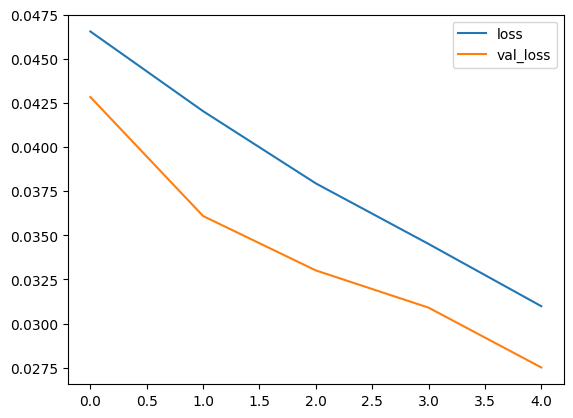

In [26]:
plt.figure(figsize=(8,5))
pd.DataFrame(mod.history).plot()
plt.show()

# 3. Make Predictions

In [28]:
input_text = vectorizer('You suck! and you`re the worst!.')

In [29]:
res = model.predict(np.expand_dims(input_text,0))

1/1 [==============================] - 1s 829ms/step


In [30]:
res

array([[0.98861736, 0.0187235 , 0.84944546, 0.00260943, 0.87957567,
        0.03045206]], dtype=float32)

In [31]:
input_text2=vectorizer("I am such big fan , keep up the good work mate.")
res2=model.predict(np.expand_dims(input_text2,0))
res2

1/1 [==============================] - 0s 55ms/step


array([[5.8812008e-04, 8.6165953e-12, 6.2120307e-06, 4.0032386e-08,
        1.1908624e-05, 1.3119481e-07]], dtype=float32)

In [32]:
formatted_res2 = [float(f"{x:.5f}") for x in res2[0]]
formatted_res2

[0.00059, 0.0, 1e-05, 0.0, 1e-05, 0.0]

In [33]:
batch_X, batch_y = test.as_numpy_iterator().next()

In [34]:
batch_X

array([[     1,      1,    171, ...,      0,      0,      0],
       [     1, 106923,     39, ...,      0,      0,      0],
       [    12,    534,     18, ...,      0,      0,      0],
       ...,
       [     8,    162,      2, ...,      0,      0,      0],
       [  1023,   2414,      5, ...,      0,      0,      0],
       [  1988,    681,     16, ...,      0,      0,      0]])

In [35]:
batch_y

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [1, 0, 1, 0, 1, 0],
       [1, 0, 1, 0, 1, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]])

In [36]:
(model.predict(batch_X) > 0.5).astype(int)

1/1 [==============================] - 0s 61ms/step


array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [1, 0, 1, 0, 1, 0],
       [1, 0, 1, 0, 1, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]])

# 4.Evaluating the Model

In [37]:
from tensorflow.keras.metrics import Precision, Recall, CategoricalAccuracy

In [38]:
pre = Precision()
re = Recall()
acc = CategoricalAccuracy()

In [39]:
for batch in test.as_numpy_iterator():
    # Unpack the batch
    X_true, y_true = batch
    # Make a prediction
    ypred = model.predict(X_true)
    # Flatten the predictions
    y_true = y_true.flatten()
    ypred = ypred.flatten()
    pre.update_state(y_true, ypred)
    re.update_state(y_true, ypred)
    acc.update_state(y_true, ypred)

1/1 [==============================] - 0s 79ms/step


In [40]:
print(f'Precision: {pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}')

Precision: 0.8906300067901611, Recall:0.8067786693572998, Accuracy:0.47241726517677307


# 5.Test and Gradio

In [42]:
!pip install gradio jinja2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 36.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.0/92.0 kB 15.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.2/318.2 kB 36.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 12.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.1/141.1 kB 21.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 78.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.4/62.4 kB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 19.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 7.1

In [43]:
import gradio as gr

In [44]:
input_str = vectorizer('It`s a shame that we are from the same country and I hate you')
res = model.predict(np.expand_dims(input_str,0))
res

1/1 [==============================] - 0s 54ms/step


array([[0.5765209 , 0.00079117, 0.02280509, 0.01763847, 0.08952378,
        0.0295751 ]], dtype=float32)

In [45]:
res>0.5

array([[ True, False, False, False, False, False]])

In [46]:
def score_comment(comment):
    vectorized_comment = vectorizer([comment])
    results = model.predict(vectorized_comment)
    text = ''
    for idx, col in enumerate(df.columns[2:]):
        text += '{} : {}\n'.format(col, results[0][idx]>0.5)
    return text

In [47]:
interface = gr.Interface(fn=score_comment,
                         inputs=gr.Textbox(lines=2, placeholder='Comment to score'),
                         outputs=gr.Text())

In [48]:
interface.launch(share=True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://30120bf7e9447e83a7.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
